<a href="https://colab.research.google.com/github/rayssasnt/notebook_regressao-linear-2/blob/main/Regress%C3%A3o_Linear_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/rayssasnt/notebook_regressao-linear-2/refs/heads/main/dataset.csv'

In [3]:
dados = pd.read_csv(url , sep=';')
dados.head(5)
# dataset de imoveis
# Valor — Valor (R$) de oferta do imóvel
# Area — Área do imóvel em m²
# Dist_Praia — Distância do imóvel até a praia (km) (em linha reta), no caso a orla mais próxima
# Dist_Farmacia — Distância do imóvel até a farmácia mais próxima (km) (em linha reta)

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


In [4]:
dados.corr().round(4)

,Valor,Area,Dist_Praia,Dist_Farmacia
Valor,1.0000,0.7110,-0.3665,-0.0244
Area,0.7110,1.0000,-0.2834,-0.0310
Dist_Praia,-0.3665,-0.2834,1.0000,0.0256
Dist_Farmacia,-0.0244,-0.0310,0.0256,1.0000


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: title={'center': 'Preço dos Imóveis'}, xlabel='Reais'>

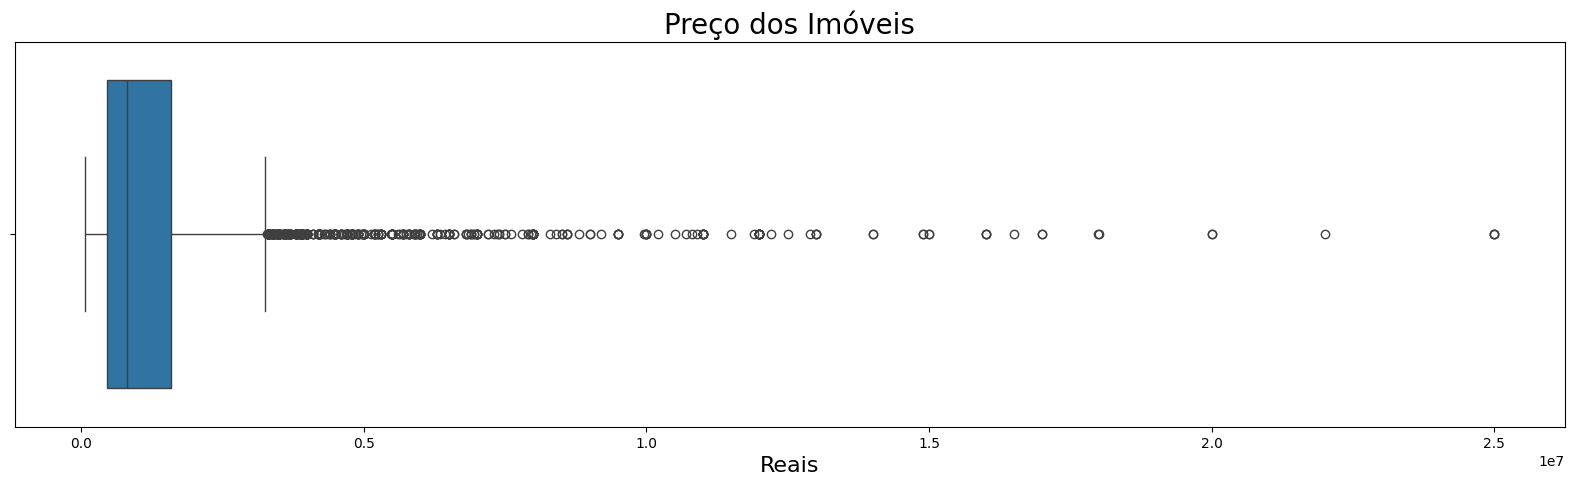

In [6]:
ax = sns.boxplot(data=dados['Valor'], orient='h')
ax.figure.set_size_inches(20, 5)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_xlabel('Reais', fontsize=16)
ax

<Axes: title={'center': 'Preço doa Imóveis'}, xlabel='Reais'>

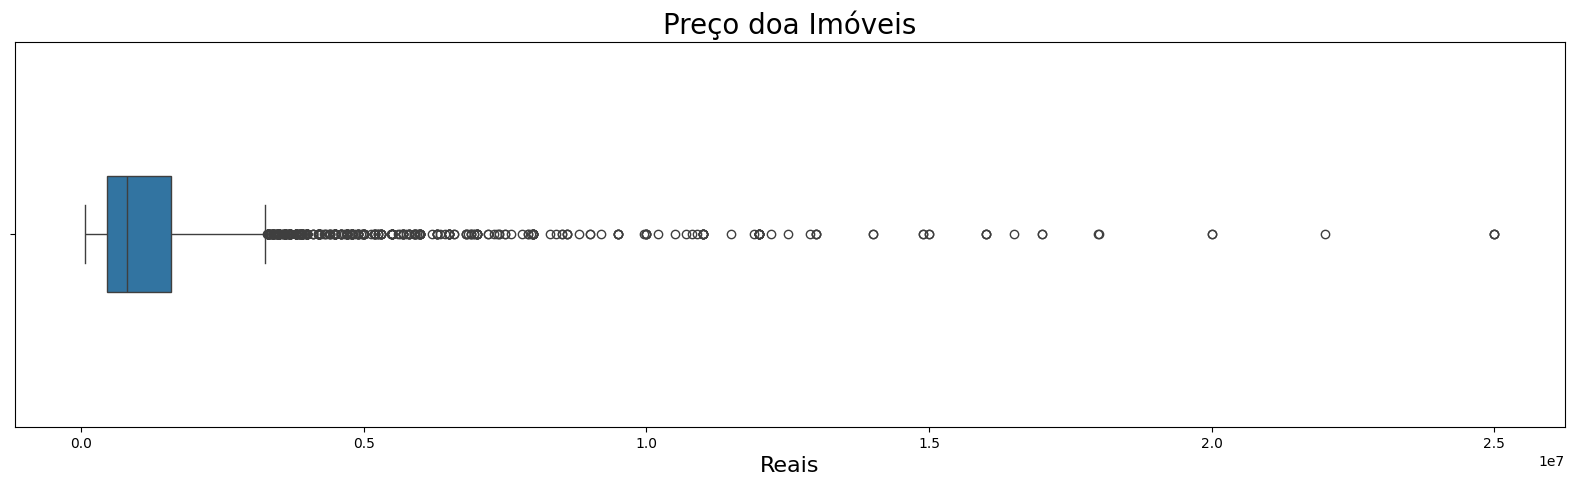

In [7]:
ax = sns.boxplot(data=dados['Valor'], orient='h', width=0.3)
ax.figure.set_size_inches(20, 5)
ax.set_title('Preço doa Imóveis', fontsize=20)
ax.set_xlabel('Reais', fontsize=16)
ax

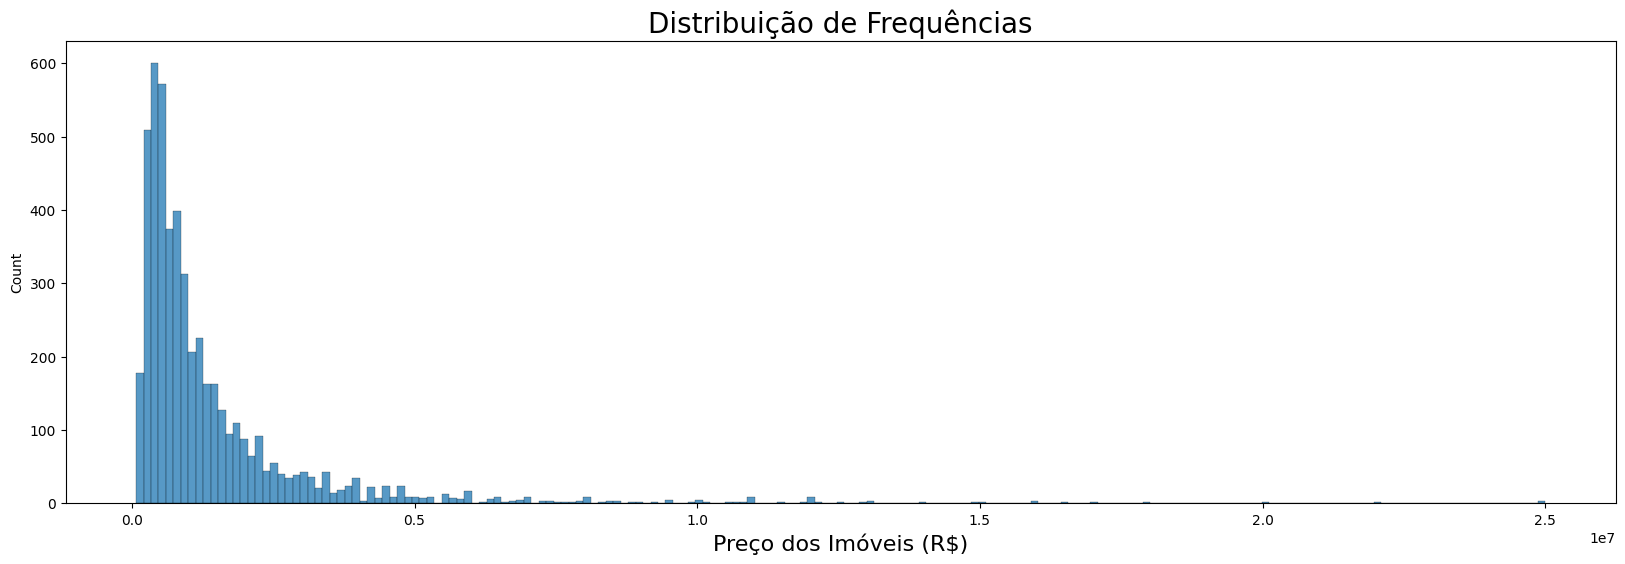

In [8]:

ax = sns.histplot(dados['Valor'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Preço dos Imóveis (R$)', fontsize=16)
plt.show()

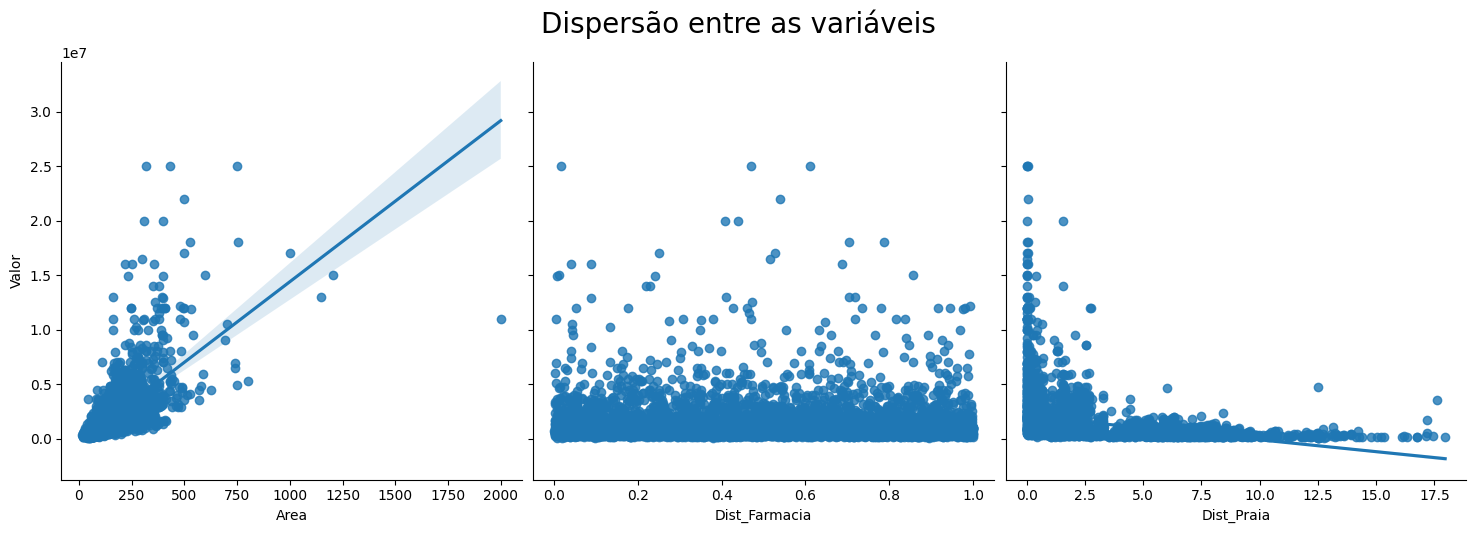

In [9]:
ax = sns.pairplot(dados, y_vars='Valor', x_vars=['Area','Dist_Farmacia','Dist_Praia'], height=5, kind='reg')
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=20, y=1.05)
ax

# Distribuição logarítmica

In [10]:
import numpy as np

In [11]:
np.log(0) # - infinito

/tmp/ipython-input-1378771977.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(0) # - infinito


np.float64(-inf)

In [12]:
dados['log_valor'] = np.log(dados['Valor'])
dados['log_area'] = np.log(dados['Area'])
dados['log_dist_praia'] = np.log(dados['Dist_Praia']+1)
dados['log_dist_farmacia'] = np.log(dados['Dist_Farmacia']+1)

In [13]:
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia,log_valor,log_area,log_dist_praia,log_dist_farmacia
0,4600000,280,0.240925,0.793637,15.341567,5.634790,0.215857,0.584245
1,900000,208,0.904136,0.134494,13.710150,5.337538,0.644028,0.126187
2,2550000,170,0.059525,0.423318,14.751604,5.135798,0.057821,0.352991
3,550000,100,2.883181,0.525064,13.217674,4.605170,1.356655,0.422036
4,2200000,164,0.239758,0.192374,14.603968,5.099866,0.214916,0.175946


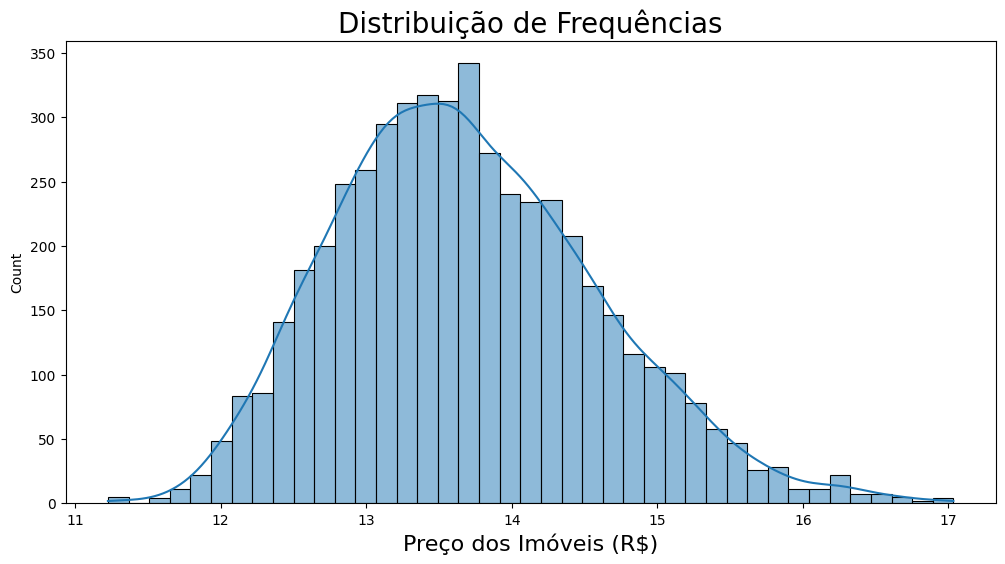

In [14]:
ax = sns.histplot(dados['log_valor'],kde='reg')
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Preço dos Imóveis (R$)', fontsize=16)
plt.show()

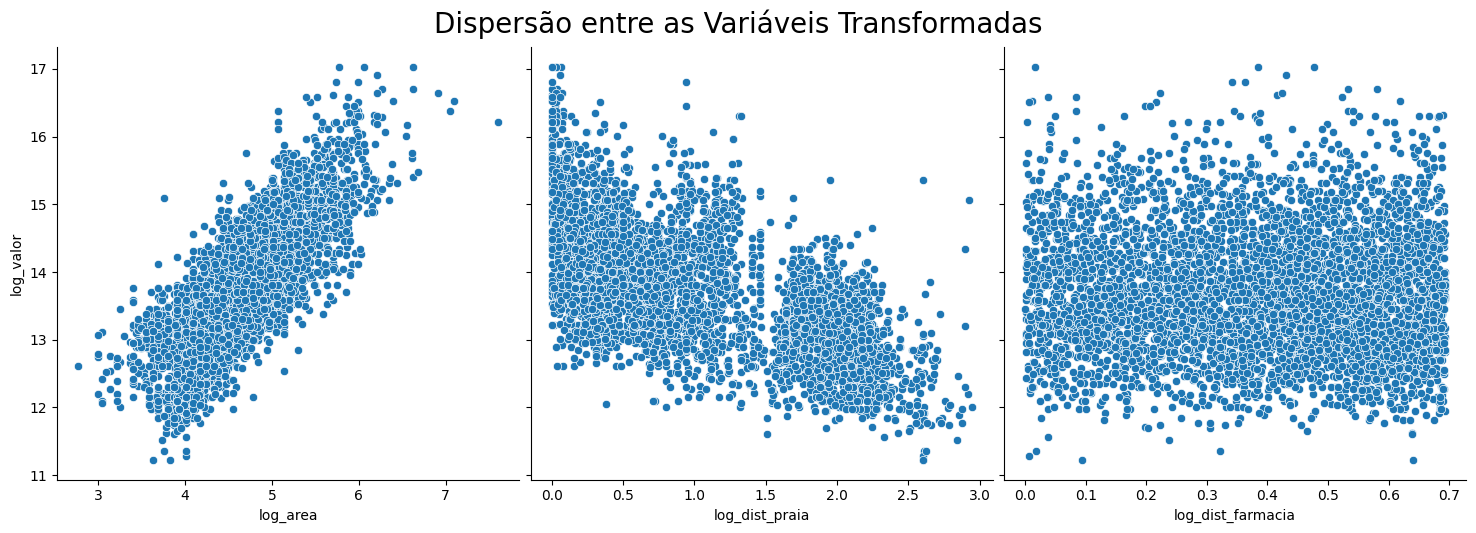

In [15]:
ax = sns.pairplot(dados, y_vars='log_valor', x_vars=['log_area', 'log_dist_praia', 'log_dist_farmacia'], height=5 )
ax.fig.suptitle('Dispersão entre as Variáveis Transformadas', fontsize=20, y=1.05)
ax

# Criando os datasets de treino e teste

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
y = dados['log_valor']
X = dados[['log_area','log_dist_praia','log_dist_farmacia']]

In [18]:
# desempacotamento de tuplas
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2811) # variaveis explicativas e dependentes

In [19]:
import statsmodels.api as sm

In [20]:
# estimando o modelo
X_train_const = sm.add_constant(X_train)

In [21]:
X_train_const

,const,log_area,log_dist_praia,log_dist_farmacia
2661,1.0,5.945421,0.000000,0.382273
912,1.0,3.135494,0.972865,0.605015
3042,1.0,4.317488,1.794961,0.486594
141,1.0,3.401197,0.310455,0.599609
3854,1.0,5.676754,0.032193,0.101903
...,...,...,...,...
3657,1.0,5.075174,2.023480,0.333605
979,1.0,4.174387,2.296141,0.156465
2389,1.0,4.394449,1.367741,0.409727
447,1.0,3.951244,2.166841,0.217381


In [22]:
model_stats = sm.OLS(y_train, X_train_const, hasconst= True).fit()

In [23]:
print(model_stats.summary())

                            OLS Regression Results                            
Dep. Variable:              log_valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5495.
Date:                Wed, 18 Feb 2026   Prob (F-statistic):               0.00
Time:                        11:23:10   Log-Likelihood:                -2044.9
No. Observations:                4000   AIC:                             4098.
Df Residuals:                    3996   BIC:                             4123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.3417      0.06

In [24]:
# modificando o modelo
X = dados[['log_area','log_dist_praia']]
# y continua o mesmo

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2811) # variaveis explicativas e dependentes

In [26]:
X_train_const = sm.add_constant(X_train)

In [27]:
model_stats = sm.OLS(y_train, X_train_const, hasconst= True).fit()

In [28]:
print(model_stats.summary())
# Avaliando as estatísticas de teste do novo modelo
# Teste de significância conjunta dos parâmetros
# Prob (F-statistic) <= 0.05(OK)

# Teste de significância conjunta dos parâmetros
# P>|t|<=0.05(OK)

                            OLS Regression Results                            
Dep. Variable:              log_valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     8244.
Date:                Wed, 18 Feb 2026   Prob (F-statistic):               0.00
Time:                        11:23:10   Log-Likelihood:                -2045.1
No. Observations:                4000   AIC:                             4096.
Df Residuals:                    3997   BIC:                             4115.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.3349      0.059    158.



---



In [29]:
# estimando o modelo com dados de treino
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [30]:
modelo = LinearRegression()

In [31]:
# utilizando fit() em 'modelo' para estimar nosso modelo linear utilizando
# os dados de treino(y_train e X_train)

modelo.fit(X_train, y_train)

LinearRegression()

In [32]:
print(f'R²: {modelo.score(X_train, y_train)}')

R²: 0.8048773977172844


In [33]:
# gerando previsões para os dados de teste X_test , utilizando predict()
# do objeto modelo

y_predict = modelo.predict(X_test)

In [34]:
print(f'R²: {metrics.r2_score(y_test,y_predict)}')

R²: 0.7904430508603385




---
## Simulador simples


In [35]:
area = 300
dist_praia = 1
prediction_input  = pd.DataFrame([[np.log(area),
           np.log(dist_praia + 1)]])

print(f"O imóvel custa R$: {np.exp(modelo.predict(prediction_input)[0]):.0f}")

O imóvel custa R$: 3368229


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [78]:

def simular():
  area = float(input("Digite a area em m² do imovel: "))
  dist_praia = float(input("Digite distância para a praia (km): "))

  entrada  = pd.DataFrame([[np.log(area),
            np.log(dist_praia + 1)]], columns=['log_area', 'log_dist_praia'])

  print(f"O imóvel pode custar R$: {np.exp(modelo.predict(entrada)[0]):.0f}")


while True:
  print('=-'*15,'\nSimulador de Preço de Imovel')
  print('\n1- Simular Imovel\n2- Para Sair')
  op = int(input("\nDigite a opção: "))

  match op:
    case 1:
      simular()
    case _:
      print("\nEncerrando..")
      break

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- 
Simulador de Preço de Imovel

1- Simular Imovel
2- Para Sair

Digite a opção: 1
Digite a area em m² do imovel: 200
Digite distância para a praia (km): 0.5
O imóvel pode custar R$: 2525688
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- 
Simulador de Preço de Imovel

1- Simular Imovel
2- Para Sair

Digite a opção: 1
Digite a area em m² do imovel: 200
Digite distância para a praia (km): 15
O imóvel pode custar R$: 790708
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- 
Simulador de Preço de Imovel

1- Simular Imovel
2- Para Sair

Digite a opção: 2

Encerrando..


In [37]:
modelo.intercept_

np.float64(9.33491640980033)

In [38]:
np.exp(modelo.intercept_)

np.float64(11326.681428069862)

In [39]:
modelo.coef_

array([ 1.05807818, -0.49061226])

In [40]:
X.columns

Index(['log_area', 'log_dist_praia'], dtype='object')

In [41]:
index = ['Intercepto','log Área', 'log Distância até a Praia']

In [42]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Intercepto,9.334916
log Área,1.058078
log Distância até a Praia,-0.490612


Mantendo-se o valor da área constante, um acréscimo de 1% na distância de um imóvel até a praia gera, em média, um acréscimo de 1.06% no preço do imóvel.

In [43]:
# gerando dados de previsão de treino
y_previsto_train = modelo.predict(X_train)

<Axes: title={'center': 'Previsao X Real'}, xlabel='log do Preço - Previsão', ylabel='log do Preço - Real'>

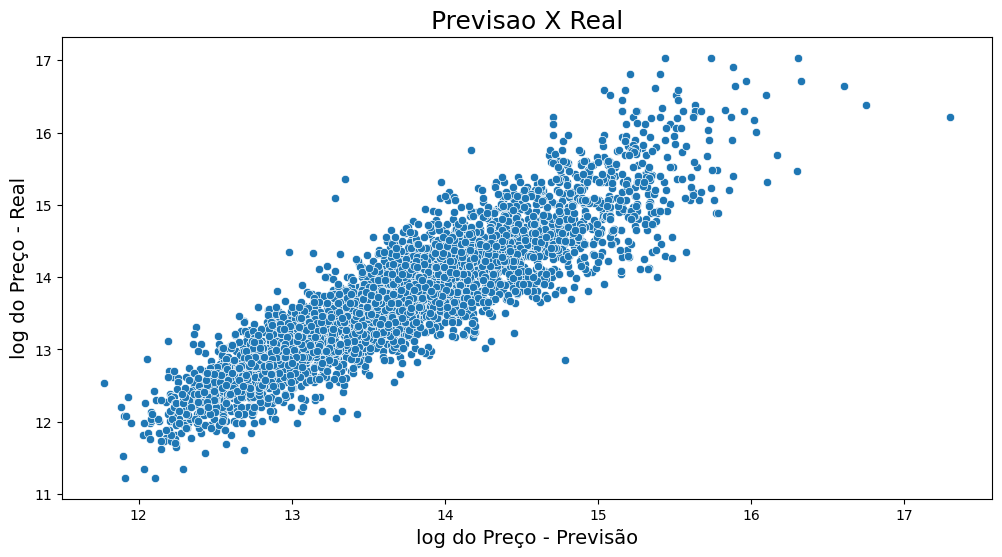

In [45]:
# grafico entre valores estimados e reais
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsao X Real', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('log do Preço - Real', fontsize=14)

ax

In [46]:
# residuos
residuo = y_train - y_previsto_train

<Axes: title={'left': 'Distribuição de Frequências dos Resíduos'}, xlabel='Log do preço'>

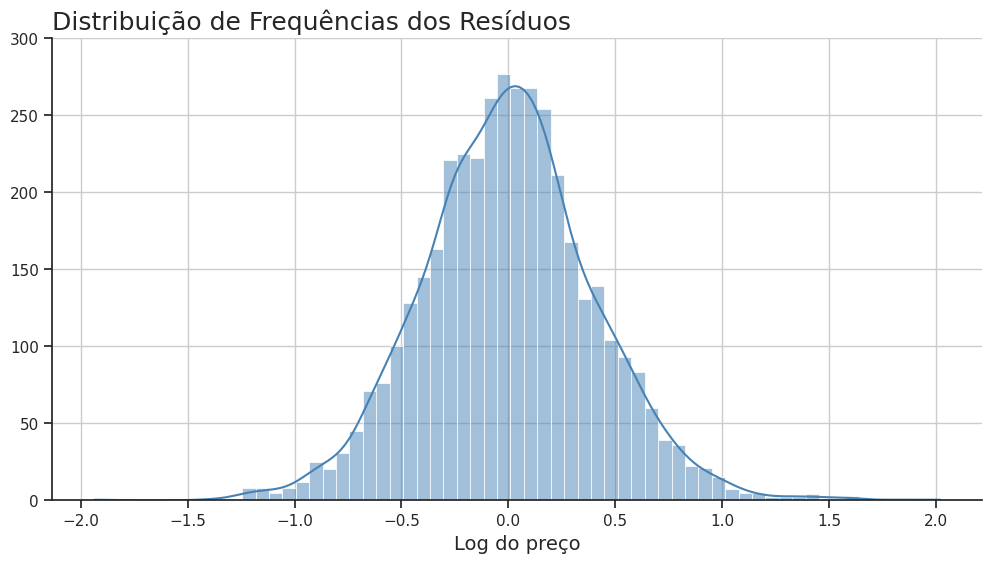

In [70]:
sns.set_theme(style='ticks')
ax = sns.histplot(residuo, kde='reg',color='steelblue')
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18,loc='left')
ax.set_xlabel('Log do preço', fontsize=14)
ax.set_ylabel('')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid()

ymax = 300
ymin=0
ax.set_ylim(ymin,ymax)
ax